### IPL 2022 Capstone Project

### Loading the Libraries and Dataset

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")

df = pd.read_csv( 'IPL.csv')
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


### Basic Information

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

Check the size of rows and columns of the dataset

Now let's see how many columns have null values in total.

In [4]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

**Now, Here comes some Basic Questions**

1. Which team won the most matches?

In [34]:
match_wins = df['match_winner'].value_counts()
match_wins

match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Delhi         7
Punjab        7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64

Text(0.5, 1.0, 'Most match win by team ')

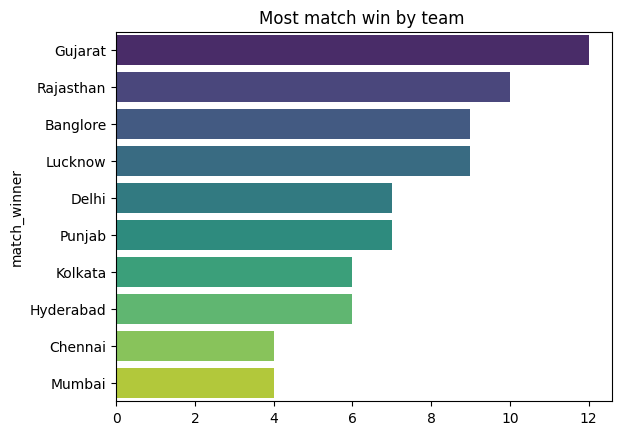

In [6]:
sns.barplot(y = match_wins.index, x = match_wins.values,palette='viridis')
plt.title("Most match win by team ")

2. Toss Decision Trends

In [7]:
df['toss_decision'].unique()

array(['Field', 'Bat'], dtype=object)

Text(0.5, 1.0, 'Toss Decision Trends ')

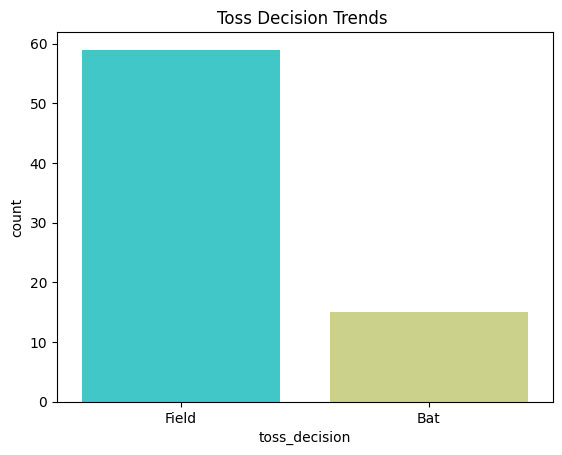

In [8]:
sns.countplot(x = df['toss_decision'],palette='rainbow')
plt.title("Toss Decision Trends ")

3. Toss Winner vs Match Winner

In [9]:
df.head(3)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59


In [10]:
# Count matches where toss winner = match winner
same_winner_count = (df['toss_winner'] == df['match_winner']).sum()

# Calculate percentage
percentage = (same_winner_count / len(df)) * 100
percentage = round(percentage, 2)

percentage

48.65

4. How do teams win? (Runs vs Wickets)

In [11]:
df.head(3)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59


In [12]:
df['won_by'].unique()

array(['Wickets', 'Runs'], dtype=object)

Text(0.5, 1.0, 'Won by')

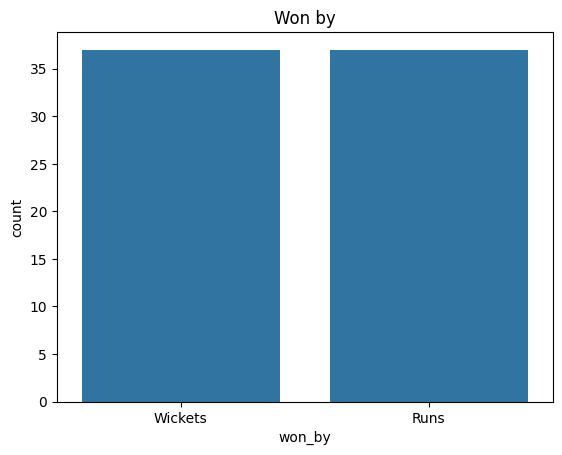

In [13]:
sns.countplot(x = df['won_by'])
plt.title("Won by")

###  Key Player Performances

Top 10 Most "Player of the Match" Awards

In [35]:
df['player_of_the_match'].value_counts()

player_of_the_match
Kuldeep Yadav        4
Jos Buttler          3
Umesh Yadav          2
Quinton de Kock      2
David Miller         2
Umran Malik          2
K L Rahul            2
Rahul Tripathi       2
Hardik Pandya        2
Jasprit Bumrah       2
Shubman Gill         2
Yuzvendra Chahal     2
Wanindu Hasaranga    2
Avesh Khan           2
Dinesh Karthik       2
Virat Kohli          1
Rinku Singh          1
Kagiso Rabada        1
Harshal Patel        1
David Warner         1
Harpreet Brar        1
Tim David            1
Yashasvi Jaiswal     1
R Aswin              1
Andre Russell        1
Shardul Thakur       1
Trent Boult          1
Devon Conway         1
W. Saha              1
Mitchell Marsh       1
Mohsin Khan          1
Daniel Sams          1
Jonny Bairstow       1
Ruturaj Gaikwad      1
Rashid Khan          1
Suruakumar Yadav     1
Anuj Rawat           1
Odean Smith          1
Mohammed Shami       1
Sanju Samson         1
Evin Lewis           1
Lockie Ferguson      1
Liam Livingsto

In [15]:
count = df['player_of_the_match'].value_counts().head(10)
count

player_of_the_match
Kuldeep Yadav      4
Jos Buttler        3
Umesh Yadav        2
Quinton de Kock    2
David Miller       2
Umran Malik        2
K L Rahul          2
Rahul Tripathi     2
Hardik Pandya      2
Jasprit Bumrah     2
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 players with man of the match')

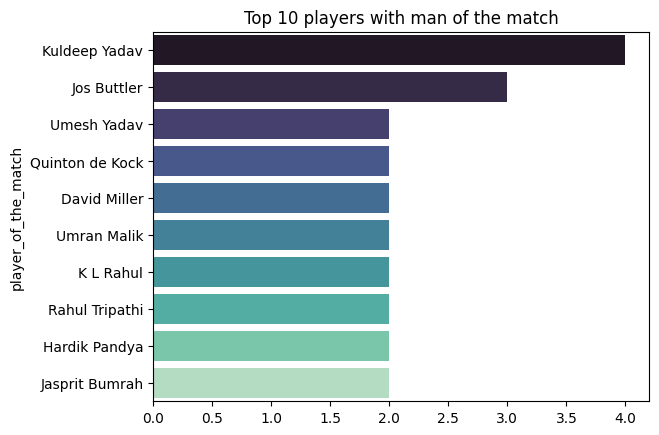

In [36]:
sns.barplot(x = count.values , y = count.index,palette='mako')
plt.title("Top 10 players with man of the match")

5 Top Scorers

In [17]:
df.head(3)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59


In [18]:
df['top_scorer']

0             MS Dhoni
1         Ishan Kishan
2       Faf du Plessis
3         Deepak Hooda
4        Aiden Markram
            ...       
69    Liam Livingstone
70         Jos Buttler
71       Rajat Patidar
72         Jos Buttler
73        Shubman Gill
Name: top_scorer, Length: 74, dtype: object

In [19]:
df['top_scorer'].value_counts()

top_scorer
Jos Buttler            7
Quinton de Kock        5
Liam Livingstone       4
Shubman Gill           4
KL Rahul               4
W. Saha                3
Faf du Plessis         3
Ishan Kishan           3
David Warner           3
Rahul Tripathi         2
Devon Conway           2
Abhishek Sharma        2
MS Dhoni               2
Hardik Pandya          2
Andre Russell          2
Mitchell Marsh         2
Virat Kohli            2
Deepak Hooda           2
Shikhar Dhawan         2
Ruturaj Gaikwad        1
Yashasvi Jaiswal       1
Sanju Samson           1
Sai Sudharsan          1
Moeen Ali              1
Nitish Rana            1
Shivam Dube            1
Riyan Parag            1
Tilak Varma            1
David Miller           1
Dinesh Karthik         1
Kane Williamson        1
Shimron Hetmyer        1
Suryakumar Yadav       1
Pat Cummins            1
Sherfane Rutherford    1
Aiden Markram          1
Rajat Patidar          1
Name: count, dtype: int64

In [20]:
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(5)
high

top_scorer
Jos Buttler        651
Quinton de Kock    377
KL Rahul           351
Shubman Gill       288
Faf du Plessis     257
Name: highscore, dtype: int64

<Axes: ylabel='top_scorer'>

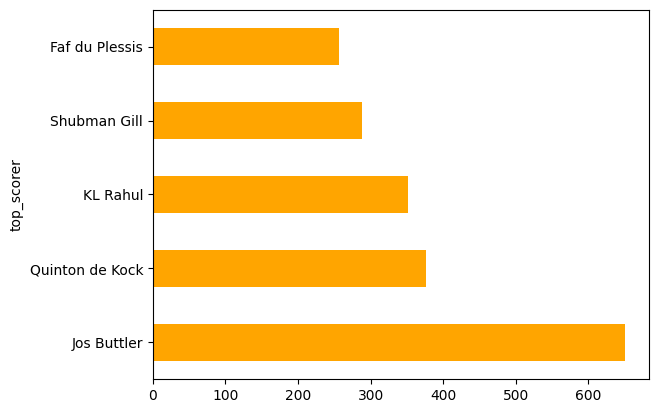

In [38]:
high.plot(kind = 'barh', color = 'orange')

Top 10 Best Bowling Figures

In [22]:
df.head(3)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59


In [39]:
df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x: x.split('--')[0])
df['highest_wickets'] = df['highest_wickets'].astype(int)

In [40]:
df.head(3)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,highest_wickets
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,...,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20,3
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,...,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18,3
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,...,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59,2


<Axes: ylabel='best_bowling'>

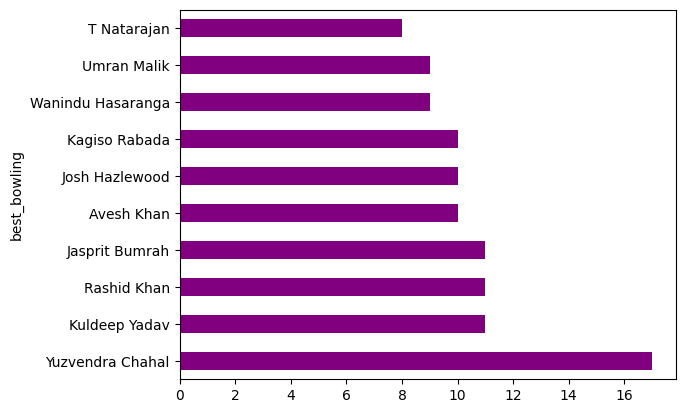

In [44]:
top_bowlers = df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending=False).head(10)
top_bowlers.plot(kind='barh', color='purple')

###  Venue Analysis

Most Matches Played by Venue

In [25]:
venue_count = df['venue'].value_counts()
venue_count

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64

<Axes: ylabel='venue'>

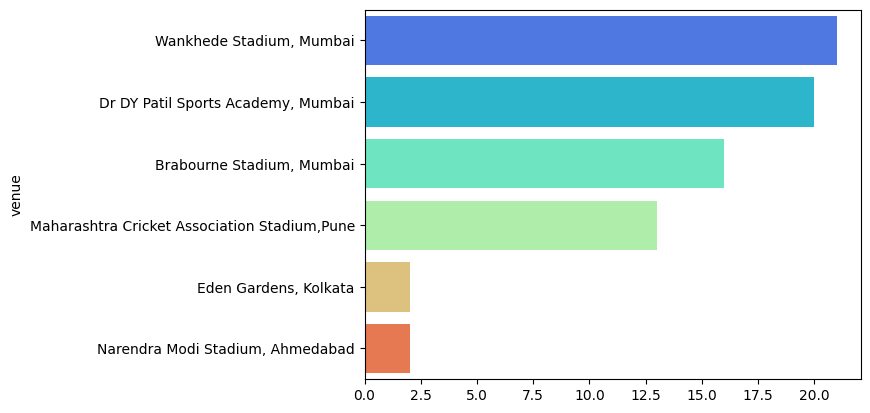

In [46]:
sns.barplot(y = venue_count.index,x = venue_count.values,palette='rainbow')

### Custom Questions & Insights
Q1.1: Who won the highest margin by runs?

In [47]:
df.head(20)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,highest_wickets
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,...,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20,3
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,...,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18,3
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,...,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59,2
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,...,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25,3
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,...,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22,3
5,6,"March 30,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Kolkata,Group,Banglore,Field,128,10,...,7,Banglore,Wickets,3,Wanindu Hasaranga,Sherfane Rutherford,28,Wanindu Hasaranga,4--20,4
6,7,"March 31,2022","Brabourne Stadium, Mumbai",Chennai,Lucknow,Group,Lucknow,Field,210,7,...,4,Lucknow,Wickets,6,Evin Lewis,Quinton de Kock,61,Ravi Bishnoi,2--24,2
7,8,"April 1,2022","Wankhede Stadium, Mumbai",Kolkata,Punjab,Group,Kolkata,Field,137,10,...,4,Kolkata,Wickets,6,Umesh Yadav,Andre Russell,70,Umesh Yadav,4--23,4
8,9,"April 2,2022","Dr DY Patil Sports Academy, Mumbai",Mumbai,Rajasthan,Group,Mumbai,Field,193,8,...,8,Rajasthan,Runs,23,Jos Buttler,Jos Buttler,100,Jasprit Bumrah,3--17,3
9,10,"April 2,2022","Maharashtra Cricket Association Stadium,Pune",Delhi,Gujarat,Group,Delhi,Field,171,6,...,9,Gujarat,Runs,14,Lockie Ferguson,Shubman Gill,84,Lockie Ferguson,4--28,4


In [48]:
df[df['won_by'] == 'Runs'].sort_values(by = 'margin',ascending=False).head(1)[['match_winner','margin']]

,match_winner,margin
54,Chennai,91


Q1.2: Who won the highest margin by runs?

In [49]:
df[df['won_by'] == 'Wickets'].sort_values(by = 'margin',ascending=False).head(1)[['match_winner','margin']]

,match_winner,margin
35,Hyderabad,9


Q2: Which player had the highest individual score?

In [50]:
df[df['highscore'] == df['highscore'].max()][['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


Q3: Which bowler had the best bowling figures?

In [31]:
df.head(3)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,highest_wickets
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,...,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20,3
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,...,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18,3
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,...,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59,2


In [51]:
df[df['highest_wickets'] == df['highest_wickets'].max()][['best_bowling','best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
